# Assignment 1: Taxpayer's Political Party

## Objective

The aim of this project to predict the taxpayer political party based on their attributes. We will use accuracy to evaluate the model performance.

## Data Source and Variables Description

The dataset can be downloaded from this [link](https://dphi.tech/challenges/taxpayers-political-party/50/leaderboard/practice/). The following are variables description.
* **HHI**: Household income

* **HHDL**: Household debt level

* **Married**: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.

* **PoliticalParty**: Name of the political party

* **CollegeGrads**: Grade in College out of 5

* **AHHAge**: Average household age

* **Cars**: number of cars in house

* **Filed in YYYY**: Tax filed in given year YYYY

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inflection
import category_encoders
import sklearn
import xgboost

from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

colors = ['#99d594', '#D53E4F', '#FC8D59']

print("Packages Version")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"inflection: {inflection.__version__}")
print(f"category_encoders: {category_encoders.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"xgboost: {xgboost.__version__}")

Packages Version
pandas: 1.1.5
numpy: 1.19.5
inflection: 0.5.1
category_encoders: 2.4.0
scikit-learn: 1.0.2
xgboost: 0.90


In [2]:
full_train = pd.read_csv("../input/taxpayer-political-party/train_set_label.csv")
display(
    full_train.shape, 
    full_train.head()
)

(803, 11)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


Observations:
* Train dataset has 803 observations with 11 columns which consist of 1 unique identifier, 3 numerical features, 5 categorical features and 1 target variable.
* The target variables has three classes which are Democrat, Republican, and Independent, so this is a multi-class classification task.

## Exploratory Data Analysis

### Check duplicate data

In [5]:
full_train[full_train.duplicated(keep=False)]

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty


The dataset do not have duplicate data.

### Descriptive Statistics

In [13]:
full_train.describe().round(2)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00,803.00
mean,502.24,155402.69,-15351.25,0.97,2.61,60.56,2.44,0.51,0.51,0.52
std,288.46,86788.15,595184.30,0.80,1.68,25.07,1.70,0.50,0.50,0.50
min,1.00,185.00,-999994.00,0.00,0.00,18.00,0.00,0.00,0.00,0.00
25%,254.50,82373.00,-516765.00,0.00,1.00,38.00,1.00,0.00,0.00,0.00
50%,501.00,156542.00,-24440.00,1.00,3.00,60.00,2.00,1.00,1.00,1.00
75%,754.50,230772.00,518135.50,2.00,4.00,82.00,4.00,1.00,1.00,1.00
max,1004.00,299374.00,999628.00,2.00,5.00,105.00,5.00,1.00,1.00,1.00


### Target Variable

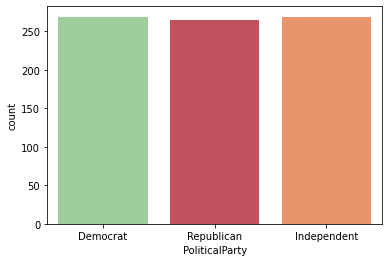

In [58]:
sns.countplot(data=full_train, x='PoliticalParty', palette=colors)

Observations:
* All classes are almost perfectly balance, with each classes count are around 250. 

### HHI, HHDL, and AHHAge

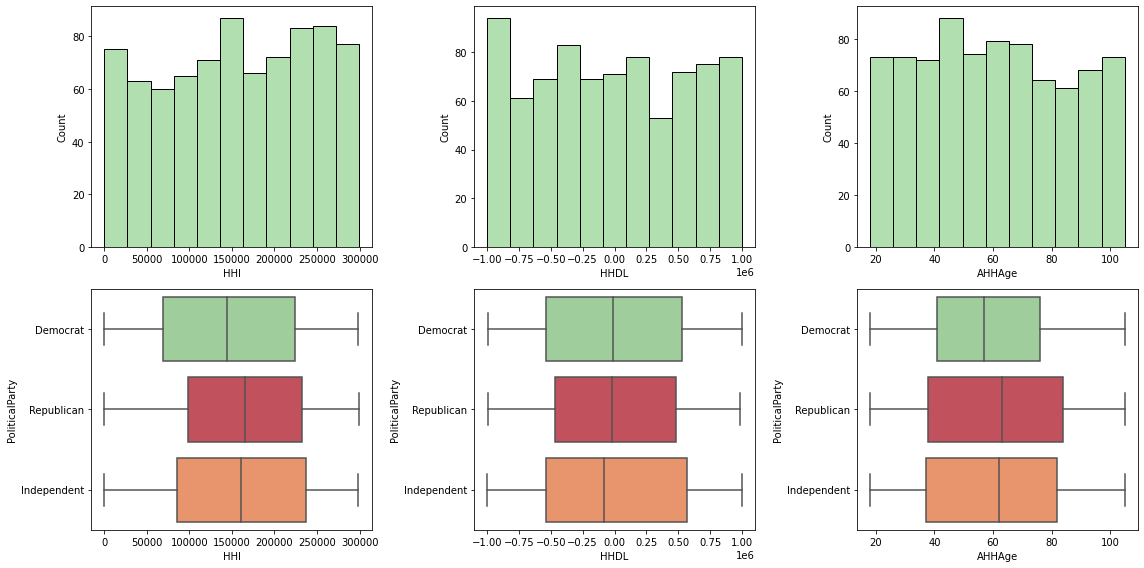

In [65]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.histplot(data=full_train, x='HHI', ax=ax[0][0], color='#99d594')
sns.histplot(data=full_train, x='HHDL', ax=ax[0][1], color='#99d594')
sns.histplot(data=full_train, x='AHHAge', ax=ax[0][2], color='#99d594')

sns.boxplot(data=full_train, x='HHI', ax=ax[1][0], y='PoliticalParty', palette=colors)
sns.boxplot(data=full_train, x='HHDL', ax=ax[1][1], y='PoliticalParty', palette=colors)
sns.boxplot(data=full_train, x='AHHAge', ax=ax[1][2], y='PoliticalParty', palette=colors)
plt.tight_layout()
plt.show()

Observations:
* No outliers are present for HHI, HHDL, AHHAge features.
* These three features tend to have a similar distribution for each target class.
* HHDL has a negative values, while HHI has only non-negative value.

### Married

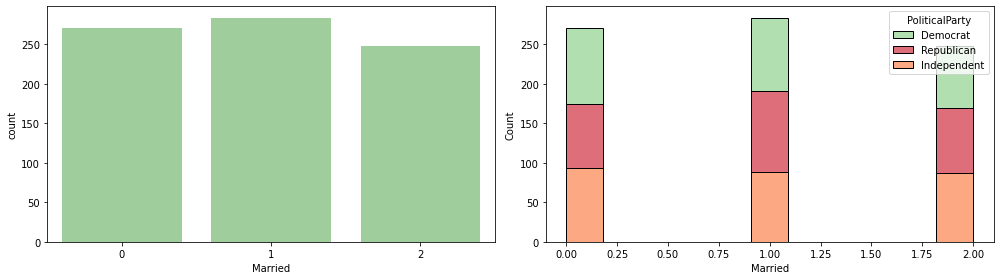

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(data=full_train, x='Married', ax=ax[0], color='#99d594')
sns.histplot(data=full_train, x='Married', ax=ax[1], hue='PoliticalParty', multiple='stack', palette=colors)
plt.tight_layout()
plt.show()

Observations:
* The married variables distributions are balance and their distribution for each target classes are near-balance.

### CollegGrads

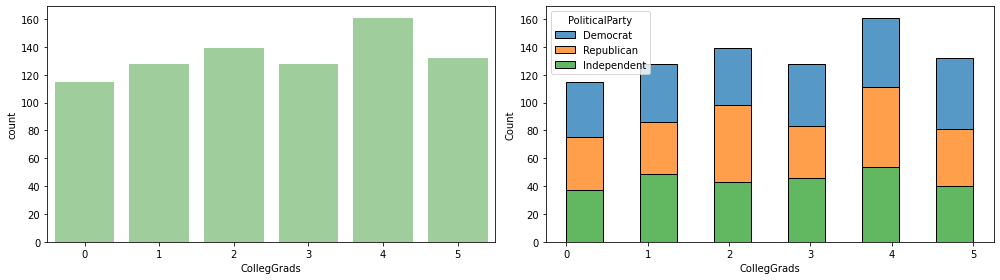

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(data=full_train, x='CollegGrads', ax=ax[0], color='#99d594')
sns.histplot(data=full_train, x='CollegGrads', ax=ax[1], hue='PoliticalParty', multiple='stack')
plt.tight_layout()
plt.show()

Observations:
* The highest college grads are class number 4, with count are around 160.
* Republican taxpayer is highest among college grads 2 and 4.

### Filed in 2015-2017

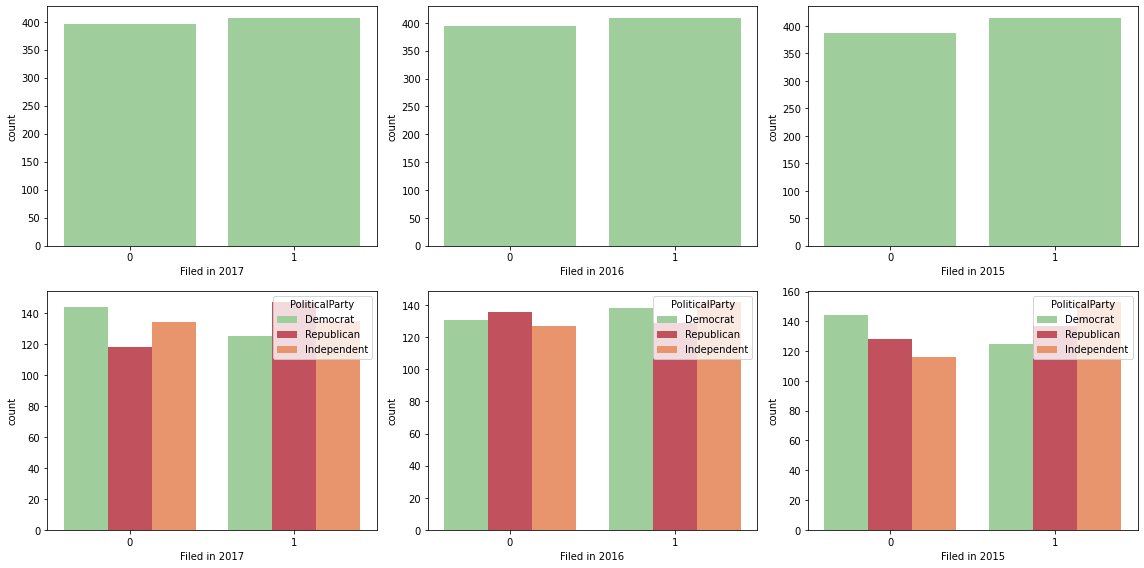

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(data=full_train, x='Filed in 2017', ax=ax[0][0], color='#99d594')
sns.countplot(data=full_train, x='Filed in 2016', ax=ax[0][1], color='#99d594')
sns.countplot(data=full_train, x='Filed in 2015', ax=ax[0][2], color='#99d594')

sns.countplot(data=full_train, x='Filed in 2017', ax=ax[1][0], hue='PoliticalParty', palette=colors)
sns.countplot(data=full_train, x='Filed in 2016', ax=ax[1][1], hue='PoliticalParty', palette=colors)
sns.countplot(data=full_train, x='Filed in 2015', ax=ax[1][2], hue='PoliticalParty', palette=colors)
plt.tight_layout()
plt.show()

In [11]:
for filed in ['Filed in 2017', 'Filed in 2016', 'Filed in 2015']:
    print(full_train[['PoliticalParty', filed]].value_counts(), '\n')

PoliticalParty  Filed in 2017
Republican      1                147
Democrat        0                144
Independent     1                135
                0                134
Democrat        1                125
Republican      0                118
dtype: int64 

PoliticalParty  Filed in 2016
Independent     1                142
Democrat        1                138
Republican      0                136
Democrat        0                131
Republican      1                129
Independent     0                127
dtype: int64 

PoliticalParty  Filed in 2015
Independent     1                153
Democrat        0                144
Republican      1                137
                0                128
Democrat        1                125
Independent     0                116
dtype: int64 



Observations:
* Taxpayer with Democrat as their political party tend to not filed the tax with their count filed in 2015 and 2017 are lowest compared to other political party.

## Feature Engineering

The following are the summary of feature engineering
1. Drop the unique identifier variable.
2. Label the target variable into integer. 
3. Apply Target Encoder to all categorical variables and AHHAge.
4. Create a new feature, delta_HHI_HHDL which is difference between HHI and HHDL.

In [24]:
def feature_engineering(df, ordinal, target):
    df = df.copy()
    df = df.drop('Unnamed: 0', axis=1)
    
    df[target] = df[target].map(
        {'Democrat': 2, 'Republican': 1, 'Independent': 0}
    )
    
    df['delta_HHI_HHDL'] = df['HHI'] - df['HHDL']
    
    target_encoder = TargetEncoder(
        cols=ordinal
    )
    return target_encoder, target_encoder.fit_transform(
        df,
        df[target]
    )

ordinal = ['Married', 'AHHAge', 'CollegGrads', 'Cars', 'Filed in 2017', 'Filed in 2016', 'Filed in 2015']
target = 'PoliticalParty'
target_encoder, encoded_df = feature_engineering(full_train, ordinal, target)
encoded_df.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty,delta_HHI_HHDL
0,183414,-12402,1.017606,0.985612,1.124886,0.941606,1.025253,1.010152,0.932530,2,195816
1,129786,700251,0.967742,1.083333,1.124886,0.975806,1.025253,1.010152,1.072165,1,-570465
2,268343,493411,0.967742,0.975155,1.000000,0.941606,0.975430,1.010152,0.932530,0,-225068
3,290506,-433408,1.017606,0.945312,1.124886,0.929134,0.975430,1.010152,0.932530,1,723914
4,90108,907135,1.017606,0.992188,1.499938,0.929134,0.975430,0.990220,1.072165,2,-817027


## Modelling
To evalute the model accuracy, we use the 5-folds cross validation and various model. Because we are going to use the Logistic Regression, all the features must be in the same range, so we normalize the data before fitting the data to model.

In [27]:
def classifiers(seed=0):
    clfs = {}
    clfs['LogisticRegression'] = LogisticRegression(
        random_state=seed, solver='liblinear', C=10
    )
    clfs['DecisionTreeClassifier'] = DecisionTreeClassifier(
        random_state=seed, max_depth=7
    )
    clfs['RandomForestClassifier'] = RandomForestClassifier(
        random_state=seed, max_depth=7
    )
    clfs['GradientBoostingClassifier'] = GradientBoostingClassifier(
        random_state=seed, max_depth=7
    )
    clfs['XGBClassifier'] = XGBClassifier(
        random_state=seed, max_depth=7
    )
    clfs['VotingClassifier_1'] = VotingClassifier(
        estimators=[
           ('dt', clfs['DecisionTreeClassifier']), 
           ('rf', clfs['RandomForestClassifier']), 
           ('gb', clfs['GradientBoostingClassifier'])
        ], voting='hard',
           weights=[3, 5, 5] #gives 37.810
    )
    clfs['VotingClassifier_2'] = VotingClassifier(
        estimators=[
           ('dt', clfs['LogisticRegression']), 
           ('rf', clfs['GradientBoostingClassifier']), 
           ('gb', clfs['XGBClassifier'])
        ], voting='hard',
           weights=[3, 5, 4]
    )
    return clfs

def evaluate(X, y, model, cv):
    results = cross_validate(
        model, 
        X, 
        y,
        cv=cv,
        scoring="accuracy"
    )

    return results
    
X = encoded_df.drop(['PoliticalParty'], axis=1)
y = encoded_df['PoliticalParty']

cv = KFold(n_splits=5, shuffle=True, random_state=0)
for name, clf in classifiers(seed=0).items():
    model = make_pipeline(
        MinMaxScaler(), 
        clf
    )
    results = evaluate(X, y, model, cv)
    print(f"{name} {np.mean(results['test_score']):.3f} +- {np.std(results['test_score']):.3f}")

LogisticRegression 0.456 +- 0.041
DecisionTreeClassifier 0.369 +- 0.041
RandomForestClassifier 0.431 +- 0.023
GradientBoostingClassifier 0.412 +- 0.039
XGBClassifier 0.404 +- 0.017
VotingClassifier_1 0.430 +- 0.035
VotingClassifier_2 0.420 +- 0.037


The best model with highest accuracy as follows:
* LogisticRegression: 45.6%
* RandomForestClassifier: 43.1%
* VotingClassifier: 43.0%

The accuracy of model are too low due to the following reasons:
1. Insufficient number of observations
2. Most of features do not have a statistical power due to their category of each classes tend to have same mean and similar distribution, even though there are no outliers present

## Feature Importances

I will use only Random Forest model to visualize the feature importances.

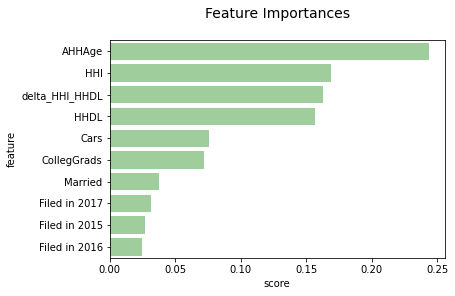

In [36]:
model = make_pipeline(
    MinMaxScaler(), 
    classifiers(seed=0)['RandomForestClassifier']
)
model.fit(X, y)
feat_imp = zip(model[0].get_feature_names_out(), model[-1].feature_importances_)
feat_imp = pd.DataFrame([*feat_imp], columns=['feature', 'score']).sort_values(by='score', ascending=False)

sns.barplot(data=feat_imp, y='feature', x='score', color=colors[0])
plt.title('Feature Importances\n', fontsize=14)
plt.show()

Observations:
* The feature with highest importance are: AHHAge, HHI, delta_HHI_HHDL, and HHDL.
* It seems the taxpayer personal attributes such as number of cars, college grade, and marital status are not too important for the model to predict the taxpayer political party
* Tax filed in 2015-2017 are less important features to the model.

## Conclusion

* The objective of this project is to predict the taxpayer political party based on their attributes. This is a multi-class classification task.
* The target variable is balance with each count around 250 and have three classes such as Democrat, Republican, and Independent.
* The dataset features have a less statistical predictive power due to each feature category per target class have same mean and similar distribution.
* The features and target are processed before modelling. 
    * All categorical variables and `AHHAge` are encoded by using Target Encoders.
    * Create a new feature, `delta_HHI_HHDL`, a difference between HHI and HHDL.
    * Label the target variable classes to integer from 0 to 2.
* At modelling stage, we observed the following model gave the best accuracy.
    * LogisticRegression: 45.6%
    * RandomForestClassifier: 43.1%
    * VotingClassifier: 43.0% 
* By evaluating the feature importances of Random Forest model, we found the following features are the most important feature to the model.
    * `AHHAge`
    * `HHI` 
    * `delta_HHI_HHDL`
    * `HHDL`

## Lesson Learned

The accuracy of model are too low due to the following reasons:
1. Insufficient number of observations. We need to gain more data by doing survey again.
2. Most of features do not have a statistical power due to their category of each classes tend to have same mean and similar distribution, even though there are no outliers present. To address this issue, we need to conduct hypothesis testing and resampling data.